<a href="https://colab.research.google.com/github/Debora-Simoes/IA901-2023S1/blob/main/projetos/Reconhecimento_acao_humana_imagem_drone/notebooks/Inference_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Going to our repository clone and installing dependencies

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/IA901_Projeto/yolov7
!pip install -qr requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1r9oHXQ5JU33TQMJZYU2USd04KCn98S1_/IA901_Projeto/yolov7


In [ ]:
import os
os.listdir('/content/drive/MyDrive/IA901_Projeto/Dados_filtrados/Teste/images')[:4]

['Drone_024.mp4_t-44.833333.jpg',
 'Drone_024.mp4_t-44.666667.jpg',
 'Drone_024.mp4_t-44.5.jpg',
 'Drone_024.mp4_t-45.166667.jpg']

In [ ]:
test_file = '/content/drive/MyDrive/IA901_Projeto/Dados_filtrados/Teste/images/Drone_024.mp4_t-45.166667.jpg'

In [ ]:
# YOLO v7 Detection Test
TMP_DIR = '/content/drive/MyDrive/IA901_Projeto/yolov7/NO_PREPROCESSING/inference/'
cmd = 'python detect.py --weights /content/drive/MyDrive/IA901_Projeto/yolov7/NO_PREPROCESSING/First_run/weights/best.pt --conf 0.25 --save-txt --exist-ok  --project "'+ TMP_DIR + '" --source "' + test_file + '"'
print(cmd)
os.system(cmd)

python detect.py --weights /content/drive/MyDrive/IA901_Projeto/yolov7/NO_PREPROCESSING/First_run/weights/best.pt --conf 0.25 --save-txt --exist-ok  --project "/content/drive/MyDrive/IA901_Projeto/yolov7/NO_PREPROCESSING/inference/" --source "/content/drive/MyDrive/IA901_Projeto/Dados_filtrados/Teste/images/Drone_024.mp4_t-45.166667.jpg"


0

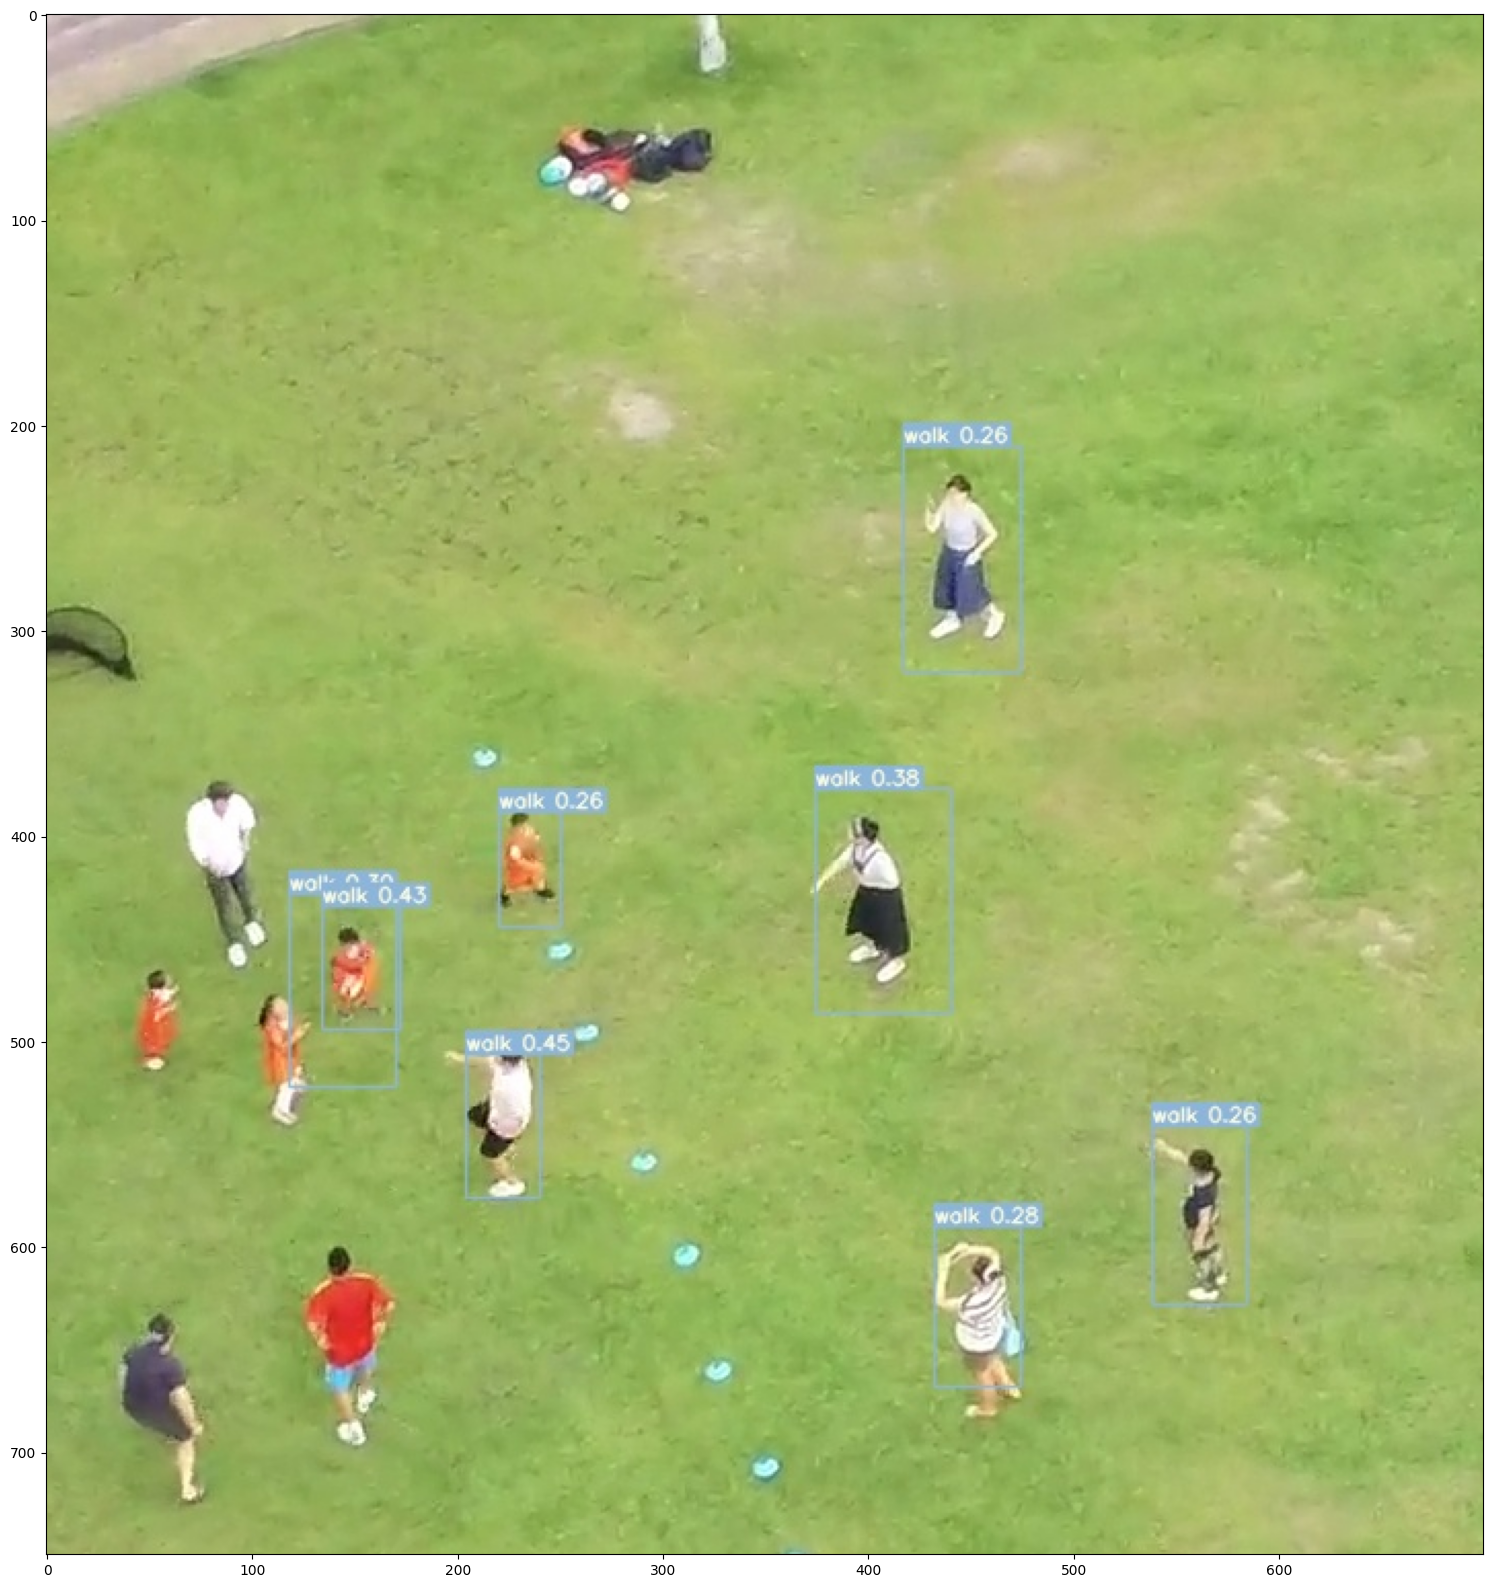

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

detect_file = TMP_DIR + 'exp/Drone_024.mp4_t-45.166667.jpg'
img = cv2.imread(detect_file)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img[500:1250,1500:2200], cv2.COLOR_BGR2RGB))

In [ ]:
# Give a title with name in the same format as the default example (not special char, no space)
EXPERIMENT_TITLE = "no_preprocessing_experiment1"

# Img size
SIZE = 640

# How many samples per iteration will be processed
BATCH_SIZE = 16

# How many epochs
EPOCHS = 20

# Model name (which must have the pretrained weights in our folder, if not, must download it)
PRETRAINED_MODEL = "yolov7"

# Number of asynchronous workers (you don't have to change it) 
WORKERS = 4

# Experiment parent folder name (you don't have to change it)
PROJECT = "human_action_detection_in_drone_images"

# Experiment child name (MUST CHANGE IT)
RUN_NAME = f"{PRETRAINED_MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}"

# Path to our data which must have "train/images", "train/labels", "val/images" and "val/labels" folders 
PATH = "/content/drive/MyDrive/IA901_Projeto/Dados_filtrados/"

# Number of unique classes (labels)
N_CLASSES = 4

# Define classes names (must have the same length as N_CLASSES)
CLASSES = ['walk', 'riding', 'stand', 'sit']

In [ ]:
# SAVING CONFIGURATIONS
import yaml
config = {'path': PATH,
         'train': PATH + 'train/',
         'val': PATH + 'val/',
         'nc': N_CLASSES,
         'names': CLASSES}
 
with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [ ]:
import torch
torch.cuda.empty_cache()

!wandb disabled

# !python train.py --img 640 --batch 16 --epochs 10 --data ./data.yaml --weights yolov7.pt --device 0 --workers 4 --project 'NO_PREPROCESSING' --name 'First_run' --exist-ok

# Continue training
!python test.py --iou 0.3 --img 640 --batch 16 --data ./data.yaml --weights /content/drive/MyDrive/IA901_Projeto/yolov7/NO_PREPROCESSING/First_run/weights/best.pt --project 'NO_PREPROCESSING' --name 'First_run' --exist-ok

/bin/bash: wandb: command not found
Namespace(weights=['/content/drive/MyDrive/IA901_Projeto/yolov7/NO_PREPROCESSING/First_run/weights/best.pt'], data='./data.yaml', batch_size=16, img_size=640, conf_thres=0.001, iou_thres=0.3, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='NO_PREPROCESSING', name='First_run', exist_ok=True, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36496081 parameters, 61949